# Phase 3 Code Challenge Review

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [40]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
# import graphviz

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


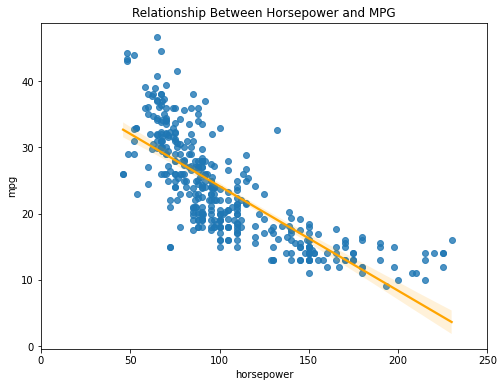

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
"""
Based on this graph the optimal slope value is approx -0.158
Cost function RSS Residual Sum of Squares
Coefs
"""

### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [ ]:
"""
You would take large steps to begin with and gradually decrease your step size until you reach the 
minimum point

Tangent lines along the curve, where the slope is zero
"""

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
"""
Your step size is your learning rate when talking about gradient descent.
It regulates step size by limiting how big your steps are

Change of the coefficient
Learning rate determines how large the steps are to start
"""

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
"""
LogReg models are used for binary targets or categorical classifications
Log-odds which are then translated into probablities
Prediction output is the probability that something will be a 0 or 1

Linear regression will use continuous variables and use a line of best fit LogReg sigmoid function
Evaluation criteria, how the coefficients are interpreted, 
classification and the other is regression

LogReg models are paramentric models (has coefficients)
"""

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
"""
LogReg vs Knn
LogReg is not as computationally demanding
Knn is much easier to understand and does not require intense training
"""

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [6]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [7]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [51]:
# Train-test split
# Set test_size=0.33 and random_state=42
# Separate data into feature and target DataFrames
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,
                                                   random_state=42)

In [68]:
# Scale the data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [55]:
195 / (195 + 67)

0.7442748091603053

#### Part 1: explore the target column breakdown in train data

In [56]:
# Code to explore
"""
We see that 73% of our targets are 0 and 27% is 1.
"""
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

Predict the majority class, 0 in this case for every test point

#### Part 3: How accurate would that baseline be on test data?


In [71]:
y_test.value_counts()

0    98
1    32
Name: target, dtype: int64

In [73]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer: 75% accurate

### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [74]:
"""
Target is imbalanced. You could use SMOTE to oversample the minority class
Or undersample the majority class
"""

'\nTarget is imbalanced. You could use SMOTE to oversample the minority class\nOr undersample the majority class\n'

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [58]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

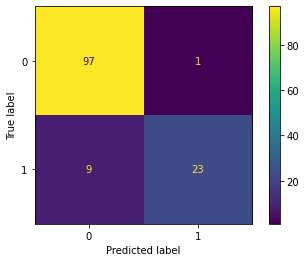

In [59]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_sc, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [75]:
tn = 97
fp = 1
fn = 9
tp = 23

acc = (tp + tn) / (tp + tn + fp + fn)
prec = tp / (tp + fp)
rec = tp / (tp + fn)
f1 = 2*(prec*rec) / (prec + rec)

In [76]:
# Accuracy
acc

0.9230769230769231

In [77]:
# Precision
prec

0.9583333333333334

In [78]:
# Recall
rec

0.71875

In [79]:
# F1-Score
f1

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [80]:
# Calculate roc-auc
y_prob = logreg.predict_proba(X_test_sc)[:, 1]
# y_hat_mpg = y_prob[:, 1]

roc_auc_score(y_test, y_prob)

0.9811862244897959

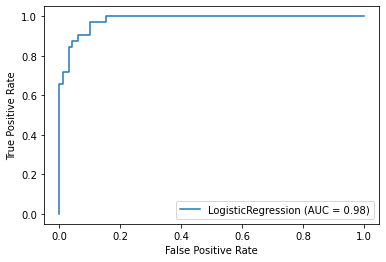

In [66]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_sc, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

Based on the metric our model is performing extremely well. TPR is higher than the FPR


## Part 4: Decision Trees

### Set Up

In [36]:
# Helper function
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [37]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

!pip install graphviz

In [ ]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

In [ ]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
"""
The first treee did a better job at splitting the data
You can tell because the leaves have a much better purity compared to the second one
this is evident by looking at the gini. Lower gini indicates more purity
"""

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [83]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

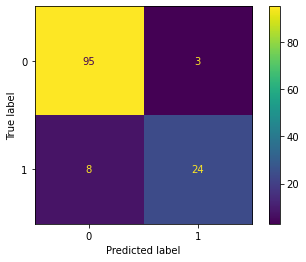

In [84]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_sc, y_test);

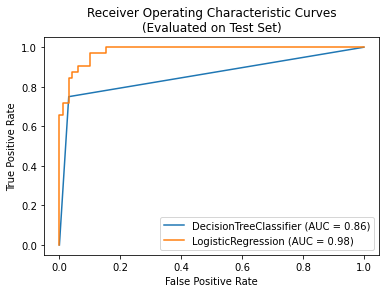

In [85]:
# Visualizing the ROCs for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_sc, y_test, ax=ax)
plot_roc_curve(logreg, X_test_sc, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
"""
The LogReg is much better than the Decision Tree Model because the AUC for the LogReg is 98%
compared to 86% on the Decision Tree.
This means that our LogReg model is 98% accurate in discriminating between positives and negatives
"""